In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [26]:
planets = sns.load_dataset('planets')
planets.dropna(subset=['orbital_period','mass','distance'],inplace=True)
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [23]:
planets.describe(include='all')

,method,number,orbital_period,mass,distance,year
count,498,498.00000,498.000000,498.000000,498.000000,498.000000
unique,2,NaN,NaN,NaN,NaN,NaN
top,Radial Velocity,NaN,NaN,NaN,NaN,NaN
freq,497,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.73494,835.778671,2.509320,52.068213,2007.377510
std,NaN,1.17572,1469.128259,3.636274,46.596041,4.167284
min,NaN,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,NaN,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,NaN,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,NaN,2.00000,999.600000,2.867500,59.332500,2011.000000


      orbital_period
year                
1989       83.888000
1995        4.230785
1996      275.145383
1997       39.845000
1998      114.310661


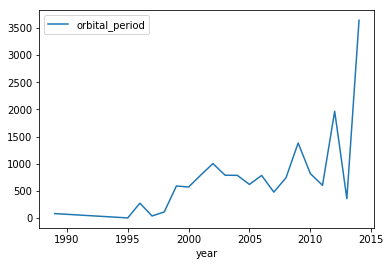

In [35]:
tt = pd.DataFrame(planets.groupby(['year']).mean()['orbital_period'])
print(tt.head())
sns.lineplot(data = tt)

[Text(0, 0, '1989'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014')]

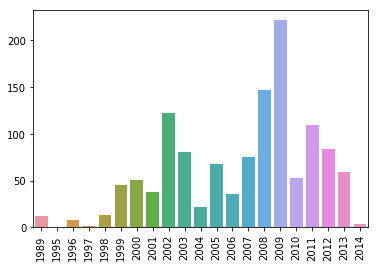

In [46]:
ttt = pd.DataFrame(planets.groupby(['year']).sum()['mass'])
tempX= ttt.index.tolist()
tempY = ttt['mass'].tolist()
chart = sns.barplot(x=tempX ,y=tempY)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

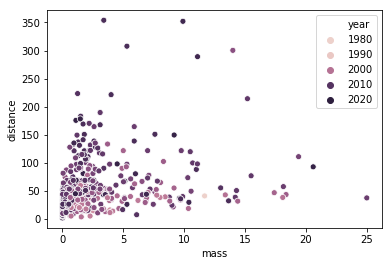

In [38]:
sns.scatterplot(planets['mass'],planets['distance'],hue=planets['year'])

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('orbital_period ~ distance', data = planets).fit()
print(results.params)
results.summary()

Intercept    893.349694
distance      -1.105685
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         orbital_period   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6107
Date:                Wed, 21 Oct 2020   Prob (F-statistic):              0.435
Time:                        13:54:50   Log-Likelihood:                -4337.5
No. Observations:                 498   AIC:                             8679.
Df Residuals:                     496   BIC:                             8687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    893.3497     98.814      9.041      0.000     699.203    1087.496
distance      -1.1057      1.415     -0.781      0.435      -3.885       1.674
==============================================================================
Omnibus:                      567.126   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43746.521
Skew:                           5.243   Prob(JB):                         0.00
Kurtosis:                      47.702   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('orbital_period ~ mass', data = planets).fit()
print(results.params)
results.summary()

Intercept    648.317826
mass          74.705833
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         orbital_period   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     17.56
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           3.30e-05
Time:                        13:52:37   Log-Likelihood:                -4329.1
No. Observations:                 498   AIC:                             8662.
Df Residuals:                     496   BIC:                             8671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    648.3178     78.712      8.237      0.000     493.667     802.969
mass          74.7058     17.828      4.190      0.000      39.678     109.734
==============================================================================
Omnibus:                      568.457   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43878.801
Skew:                           5.265   Prob(JB):                         0.00
Kurtosis:                      47.763   Cond. No.                         5.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('orbital_period ~ mass+distance', data = planets).fit()
print(results.params)
results.summary()

Intercept    774.759056
mass          84.972396
distance      -2.923152
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         orbital_period   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           2.36e-05
Time:                        13:55:30   Log-Likelihood:                -4327.0
No. Observations:                 498   AIC:                             8660.
Df Residuals:                     495   BIC:                             8673.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    774.7591    100.242      7.729      0.000     577.807     971.711
mass          84.9724     18.480      4.598      0.000      48.663     121.282
distance      -2.9232      1.442     -2.027      0.043      -5.757      -0.090
==============================================================================
Omnibus:                      562.366   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42186.764
Skew:                           5.177   Prob(JB):                         0.00
Kurtosis:                      46.885   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""